<a href="https://colab.research.google.com/github/zhukuixi/AshenOne/blob/master/Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Kuixi Zhu
# 9/17/2022
# Reference: https://yxudong.github.io/Dijkstra-%E6%9C%80%E7%9F%AD%E8%B7%AF%E5%BE%84%E7%AE%97%E6%B3%95-Python-%E5%AE%9E%E7%8E%B0/

class Dijkstra:
  def __init__(self,G):
    self.graph = G
    self.nodeCount = len(G)
    self.dist = {(ind_startNode,ind_endNode):distance  for ind_startNode,distanceRow in enumerate(self.graph) for ind_endNode,distance in enumerate(distanceRow)  }
      
  def shortestPath(self,initPointIndex):
    visited = [0]*self.nodeCount
    visited[initPointIndex] = 1
    lastNode = initPointIndex
    distanceFromInitPoint = {key[1]:value for key, value in self.dist.items() if key[0] == initPointIndex}
    edgeRecord = {initPointIndex:-1}
    # nodeCount - 1 iteration
    for i in range(self.nodeCount-1):
      
      # looking for the unvisited node cloested to the lastNode
      currentLongestDistance = float('inf')
      candidateLastNode = None
      for j in range(self.nodeCount):        
        if visited[j] == 0 and self.dist[(lastNode,j)] < currentLongestDistance:
          currentLongestDistance = self.dist[(lastNode,j)]
          candidateLastNode = j
      # update the distance matrix
      ## update from visiting node   
      distanceFromInitPoint[candidateLastNode] = currentLongestDistance + distanceFromInitPoint[lastNode]
      ## update from the child node of visiting node
      for k in range(self.nodeCount):
        newDistance = self.dist[(candidateLastNode,k)] + distanceFromInitPoint[candidateLastNode]
        if newDistance < distanceFromInitPoint[k]:
          distanceFromInitPoint[k] = newDistance
      # record the edge from the visiting node and mark it as visited
      edgeRecord[candidateLastNode] = lastNode
      visited[candidateLastNode] = 1
      lastNode = candidateLastNode
      
    return distanceFromInitPoint,edgeRecord
        






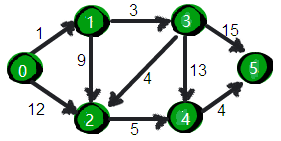

In [33]:

if __name__ == '__main__':
    inf = float('inf')
    G = [[0, 1, 12, inf, inf, inf],
         [inf, 0, 9, 3, inf, inf],
         [inf, inf, 0, inf, 5, inf],
         [inf, inf, 4, 0, 13, 15],
         [inf, inf, inf, inf, 0, 4],
         [inf, inf, inf, inf, inf, 0]]

    dij = Dijkstra(G)
    dis, parents = dij.shortestPath(0)
    print("dis: ", dis)
    print("parents: ", parents)

dis:  {0: 0, 1: 1, 2: 8, 3: 4, 4: 13, 5: 17}
parents:  {0: -1, 1: 0, 3: 1, 2: 3, 4: 2, 5: 4}
